In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [32]:
#@title KMean Clustering

In [8]:
x,y = make_blobs(n_samples=1000,centers=3,random_state=17)

In [9]:
x

array([[-5.29606839,  3.82645217],
       [ 5.1587235 ,  1.7615102 ],
       [-3.27328309, -0.86410146],
       ...,
       [-3.5478142 ,  2.43061113],
       [-4.09386347,  1.1530462 ],
       [-1.93544295,  1.76404536]])

In [10]:
y

array([0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2,
       2, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2,
       1, 0, 0, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0,
       0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2,
       1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1,
       2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2,
       1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1,

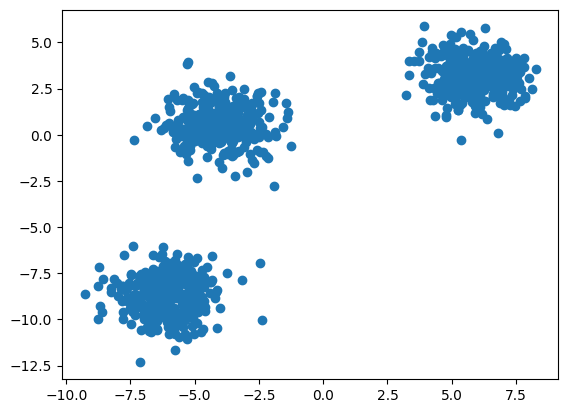

In [11]:
plt.scatter(x[:,0],x[:,1])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=17)

In [13]:
from sklearn.cluster import KMeans

In [18]:
## Elbow method to select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [19]:
wcss

[36431.35432689011,
 11643.755818826034,
 1389.274683735626,
 1210.865043334793,
 1049.0016042218556,
 895.068646346562,
 781.4129615578984,
 675.9591431720335,
 578.8188177121133,
 529.0813273135367]

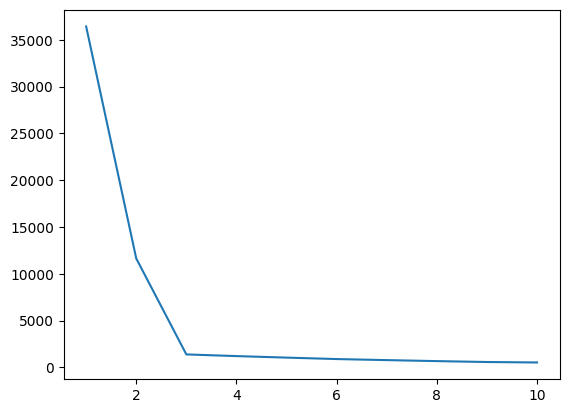

In [21]:
plt.plot(range(1,11),wcss)

In [22]:
kmeans=KMeans(n_clusters=3,init="k-means++")
y_labels=kmeans.fit_predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


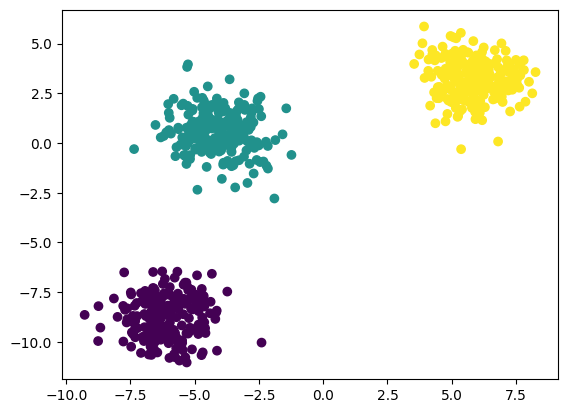

In [25]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)
#here in this problem as we made blobs we know the output Y values but in the real datasets we have to calculate y_labels and we have to
#plot the scatter plot to diffrentiate varies clustors

In [27]:
## knee locator
!pip install kneed

In [28]:
#from here we are going to verify the number of clusters that were obtained by graphical method
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [29]:
## Silhoutte score
from sklearn.metrics import silhouette_score
#just like confusion matrix is metric for regression this is metric to define the acuracy of clustring

In [30]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

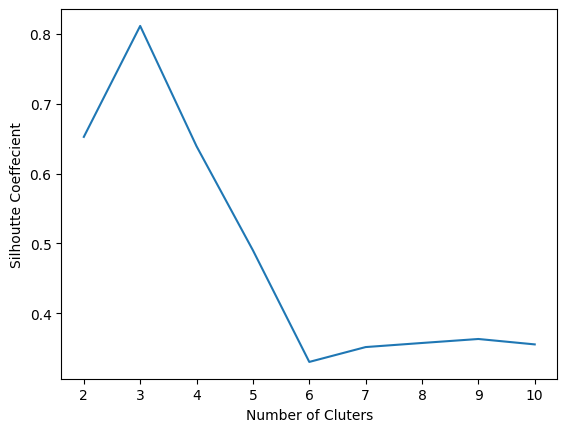

In [31]:
silhouette_coefficients
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [33]:
#@title Hierarical Clustring

In [35]:
from sklearn import datasets

In [43]:
iris=datasets.load_iris()

In [44]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [45]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [47]:
x_scaled=scaler.fit_transform(df)

In [48]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [49]:
x_scaled.shape

(150, 4)

In [50]:
#reducing the dimensions of given datasets
from sklearn.decomposition import PCA

In [51]:
pca=PCA(n_components=2)

In [53]:
x_pca_scaled=pca.fit_transform(x_scaled)

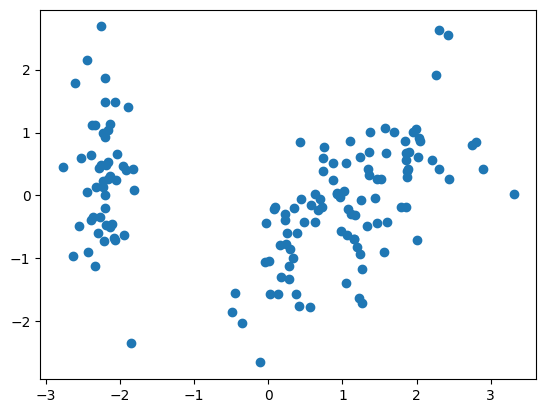

In [54]:
plt.scatter(x_pca_scaled[:,0],x_pca_scaled[:,1])

In [55]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(x_pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [56]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

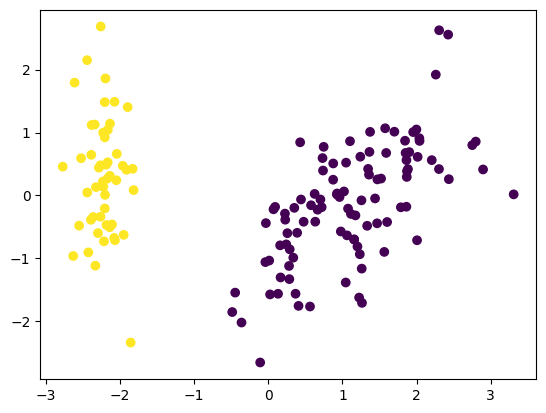

In [57]:
plt.scatter(x_pca_scaled[:,0],x_pca_scaled[:,1],c=cluster.labels_)

In [58]:
#in the above condition we just took number of clusters=2 now we will iterate through loop to find best number cluster
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(x_pca_scaled)
    score = silhouette_score(x_pca_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

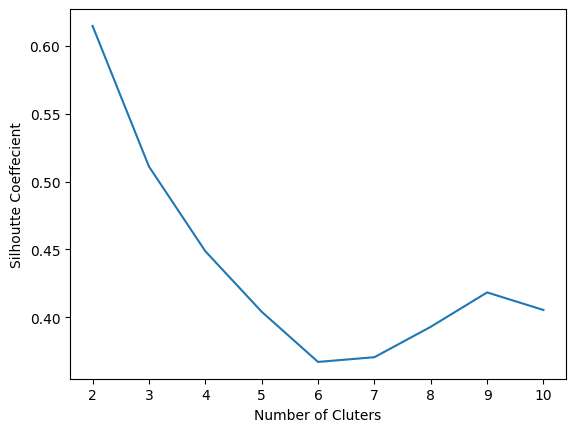

In [59]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [60]:
cluster=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
cluster.fit(x_pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [61]:
cluster.labels_

array([0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 5, 5, 5, 4, 2, 4, 5, 4, 2, 4, 4, 2, 4, 2, 2, 5,
       2, 4, 2, 4, 5, 2, 2, 2, 2, 2, 2, 5, 2, 4, 4, 4, 4, 2, 2, 5, 5, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 1, 2, 1, 2, 1, 1, 4, 1, 2, 1,
       5, 2, 1, 2, 2, 5, 5, 1, 1, 2, 1, 2, 1, 2, 5, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 5, 5, 2, 1, 1, 1, 2, 1, 1, 1, 2, 5, 5, 2])

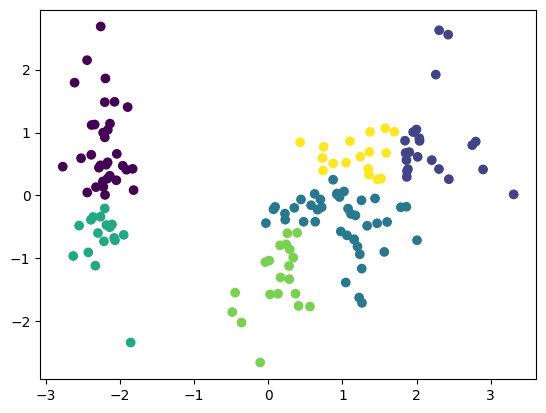

In [63]:
plt.scatter(x_pca_scaled[:,0],x_pca_scaled[:,1],c=cluster.labels_)
#we founded by using the given dataset infromaton there are 6 types of flower types

In [64]:
#@title DBSCAN Clustring

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [66]:
X,y=make_moons(n_samples=250,noise=0.10)

In [67]:
X

array([[ 1.38182412e+00, -3.48936983e-01],
       [ 9.37920520e-01,  2.55024191e-01],
       [-5.66895412e-02,  9.41466149e-01],
       [ 2.39043808e-01, -2.45518337e-01],
       [-1.05211086e-01,  1.15444094e+00],
       [ 9.50323324e-01,  4.93889390e-01],
       [ 2.75088242e-02,  3.04958888e-01],
       [ 1.02642877e+00,  4.23933943e-01],
       [ 5.32520238e-01,  6.71012319e-01],
       [ 1.32781879e-01,  1.01329847e+00],
       [-6.32310952e-01,  6.97079518e-01],
       [ 4.13635865e-01, -1.81521985e-01],
       [-1.29863457e-01,  1.02272050e+00],
       [ 1.89173427e+00,  6.51027616e-02],
       [ 6.98826256e-01,  7.87958252e-01],
       [-3.40586404e-01,  1.08030211e+00],
       [ 1.98877103e+00,  4.12295044e-01],
       [ 1.93496507e-02,  2.37112469e-01],
       [ 2.18335504e-01,  1.00133853e+00],
       [ 4.48747741e-01,  7.07181725e-01],
       [ 4.68688130e-02,  1.12553096e-01],
       [ 1.74470520e+00, -2.46746158e-01],
       [ 9.83273146e-01,  4.90206210e-01],
       [ 1.

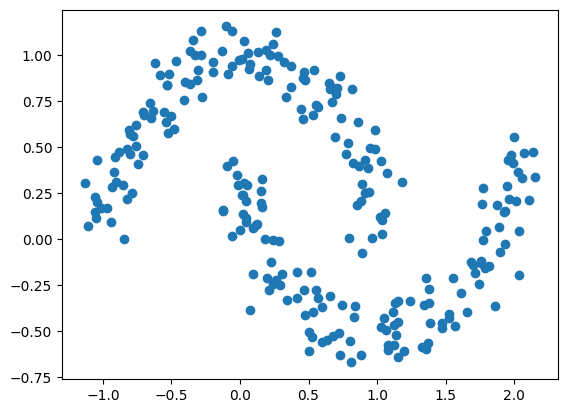

In [68]:
plt.scatter(X[:,0],X[:,1])

In [69]:
##feature scaling(Standard Scaling)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [70]:
X_scaled=scaler.fit_transform(X)

In [71]:
dbcan=DBSCAN(eps=0.5)

In [79]:
dbcan.fit(X_scaled)

DBSCAN()

In [80]:
dbcan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

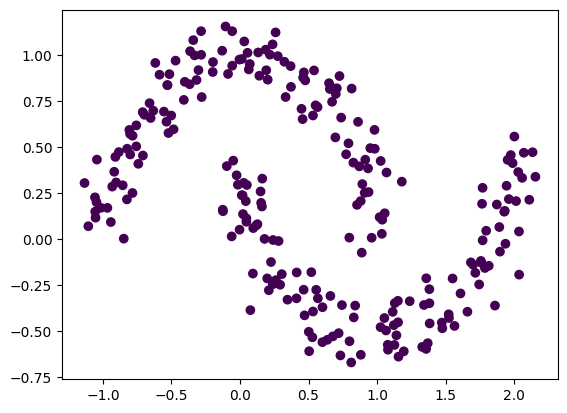

In [77]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)